### selective search를 이용하여 Object Detection을 위한 Region Proposal 영역을 도출

In [ ]:
!pip install selectivesearch

In [ ]:
!mkdir /content/data
!wget -O /content/data/audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg

img shape: (450, 375, 3)


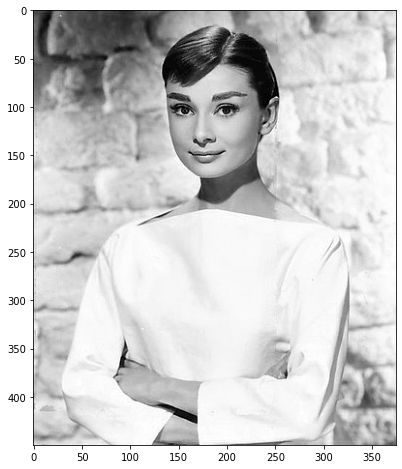

In [ ]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

#오드리햅번 이미지를 cv2로 로드하고 matplotlib으로 시각화
img=cv2.imread('/content/data/audrey01.jpg')
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

In [ ]:
#selectiveearch.selecrtive_search()는 이미지의 Region Proposal 정보를 반환
_,regions=selectivesearch.selective_search(img_rgb,scale=100,min_size=2000)

print(type(regions),len(regions))

<class 'list'> 41


반환된 regions 변수는 리스트 타입으로 세부 원소로 딕셔너리를 가지고 있다.

* 개별 딕셔너리내 KEY값별 의미
1. rect 키 값은 x,y 시작 좌표와 너비, 높이 값을 가지며 이 값이 Detected Object 후보를 나타내는 Bounding box이다.
2. size는 segment로 select된 Object의 크기
3. labels는 해당 rect로 지정된 Bounding Box내에 있는 오브젝트들의 고유 ID
4. 아래로 내려갈 수록 너비와 높이 값이 큰 Bounding box이며 하나의 Bounding box에 여러개의 오브젝트가 있을 확률이 커짐

In [ ]:
regions

[{'labels': [0.0], 'rect': (0, 0, 107, 167), 'size': 11166},
 {'labels': [1.0], 'rect': (15, 0, 129, 110), 'size': 8771},
 {'labels': [2.0], 'rect': (121, 0, 253, 133), 'size': 17442},
 {'labels': [3.0], 'rect': (134, 17, 73, 62), 'size': 2713},
 {'labels': [4.0], 'rect': (166, 23, 87, 176), 'size': 8639},
 {'labels': [5.0], 'rect': (136, 53, 88, 121), 'size': 4617},
 {'labels': [6.0], 'rect': (232, 79, 117, 147), 'size': 7701},
 {'labels': [7.0], 'rect': (50, 91, 133, 123), 'size': 7042},
 {'labels': [8.0], 'rect': (305, 97, 69, 283), 'size': 11373},
 {'labels': [9.0], 'rect': (0, 161, 70, 46), 'size': 2363},
 {'labels': [10.0], 'rect': (72, 171, 252, 222), 'size': 34467},
 {'labels': [11.0], 'rect': (0, 181, 118, 85), 'size': 5270},
 {'labels': [12.0], 'rect': (106, 210, 89, 101), 'size': 2868},
 {'labels': [13.0], 'rect': (302, 228, 66, 96), 'size': 2531},
 {'labels': [14.0], 'rect': (0, 253, 92, 134), 'size': 7207},
 {'labels': [15.0], 'rect': (153, 270, 173, 179), 'size': 10360},


In [ ]:
#rect 정보만 출력해서 보기
cand_rects=[cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 107, 167), (15, 0, 129, 110), (121, 0, 253, 133), (134, 17, 73, 62), (166, 23, 87, 176), (136, 53, 88, 121), (232, 79, 117, 147), (50, 91, 133, 123), (305, 97, 69, 283), (0, 161, 70, 46), (72, 171, 252, 222), (0, 181, 118, 85), (106, 210, 89, 101), (302, 228, 66, 96), (0, 253, 92, 134), (153, 270, 173, 179), (0, 305, 47, 139), (104, 312, 80, 71), (84, 360, 91, 67), (0, 362, 171, 87), (297, 364, 77, 85), (0, 91, 183, 175), (136, 23, 117, 176), (72, 171, 254, 278), (134, 17, 119, 182), (302, 97, 72, 283), (121, 0, 253, 226), (0, 91, 183, 175), (0, 0, 144, 167), (0, 0, 253, 199), (0, 253, 92, 191), (0, 91, 183, 353), (0, 171, 326, 278), (0, 97, 374, 352), (84, 312, 100, 115), (0, 91, 184, 353), (0, 91, 195, 353), (0, 0, 374, 444), (0, 0, 374, 449), (0, 0, 374, 449), (0, 0, 374, 449)]


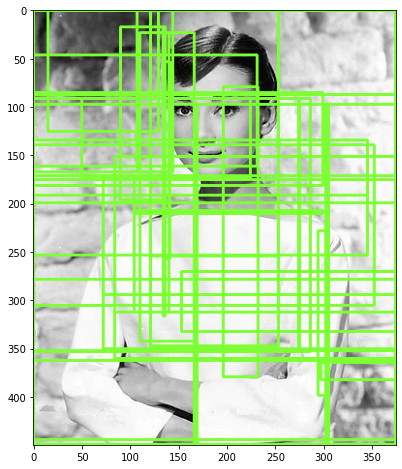

In [ ]:
#bounding box를 시각화 하기
#opencv의 rectangle()을 이용하여 시각화
#rectangle()은 이미지와 자상단 좌표, 우하단 좌표, box컬러색, 두께등을 인자로 입력하면 원본 이미지에 박스를 그려줌

green_rgb=(125,255,51)
img_rgb_copy=img_rgb.copy()
for rect in cand_rects:
  left=rect[0]
  top=rect[1]
  #좌상단 우하단 좌료를 구해준다.
  right=top+rect[2]
  bottom=left+rect[3]

  img_rgb_copy=cv2.rectangle(img_rgb_copy,(left,top),(right,bottom),color=green_rgb,thickness=2)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb_copy)
plt.show()

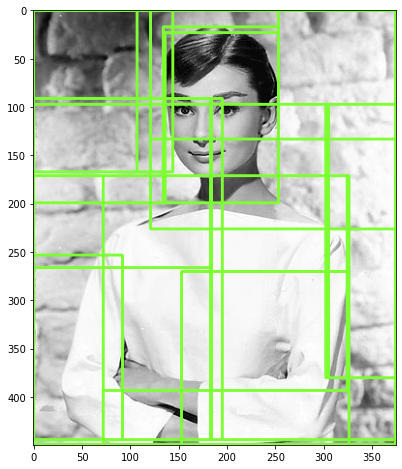

In [ ]:
#bounding box의 크기가 큰 후보만 추출

cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함. 
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

## IOU구하기

IOU란 예측한 bounding box가 실제 bounding box와 얼마나 겹치는 지를 알려주는 지표

**IOU= 실제 bbox ∩ 예측 bbox / 실제 bbox ∪ 예측 bbox**

In [ ]:
import numpy as np

#입력인자로 후보 박스와 실제 박스를 받아서 IOU를 계산하는 함수 생성

def compute_ioc(cand_box,gt_box):
  x1=np.maximum(cand_box[0],gt_box[0])
  y1=np.maximum(cand_box[1],gt_box[1])
  x2=np.minimum(cand_box[2],gt_box[2])
  y2=np.minimum(cand_box[3],gt_box[3])

  intersection=np.maximum(x2-x1 ,0) * np.maximum(y2-y1,0)

  cand_box_area=(cand_box[2]-cand_box[0]) * (cand_box[3]-cand_box[1])
  gt_box_area=(gt_box[2]-gt_box[0]) * (gt_box[3]-gt_box[1])
  union=cand_box_area+gt_box_area-intersection

  return intersection/union


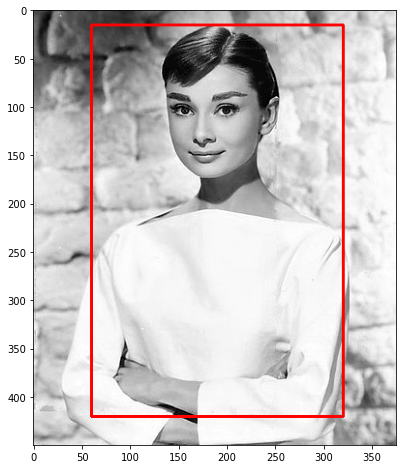

In [ ]:
#실제 box의 좌표를 아래와 같다고 가정
gt_box=[60,15,320,420]

red=(255,0,0)
img_rgb=cv2.rectangle(img_rgb,(gt_box[0],gt_box[1]),(gt_box[2],gt_box[3]),color=red,thickness=2)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

In [ ]:
img=cv2.imread('/content/data/audrey01.jpg')
img_rgb2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
_,regions=selectivesearch.selective_search(img_rgb2,scale=100,min_size=2000)

In [ ]:
cand_rects=[cand['rect'] for cand in regions]

for index,cand_box in enumerate(cand_rects):
  cand_box=list(cand_box)
  cand_box[2]+=cand_box[0]
  cand_box[3]+=cand_box[1]

  iou=compute_ioc(cand_box,gt_box)
  print('index:',index,'iou:',iou)

index: 0 iou: 0.06157293686705451
index: 1 iou: 0.07156308851224105
index: 2 iou: 0.2033654637255666
index: 3 iou: 0.04298195631528965
index: 4 iou: 0.14541310541310543
index: 5 iou: 0.10112060778727446
index: 6 iou: 0.11806905615946989
index: 7 iou: 0.1420163334272036
index: 8 iou: 0.035204259342190375
index: 9 iou: 0.004256894317971497
index: 10 iou: 0.5184766640298338
index: 11 iou: 0.04465579710144928
index: 12 iou: 0.0853656220322887
index: 13 iou: 0.015722240419259743
index: 14 iou: 0.037833068643021
index: 15 iou: 0.22523535071077264
index: 16 iou: 0.0
index: 17 iou: 0.053941120607787274
index: 18 iou: 0.05154006626579948
index: 19 iou: 0.05660327592118798
index: 20 iou: 0.01165009904393209
index: 21 iou: 0.18588082901554404
index: 22 iou: 0.19555555555555557
index: 23 iou: 0.5409250175192712
index: 24 iou: 0.205679012345679
index: 25 iou: 0.042245111210628454
index: 26 iou: 0.34848824374009246
index: 27 iou: 0.18588082901554404
index: 28 iou: 0.10952135872362326
index: 29 iou: 

img shape: (450, 375, 3)
index: 8 iou: 0.5184766640298338 rectangle: (72, 171, 324, 393)
index: 18 iou: 0.5409250175192712 rectangle: (72, 171, 326, 449)
index: 28 iou: 0.5490037131949166 rectangle: (0, 97, 374, 449)
index: 32 iou: 0.6341234282410753 rectangle: (0, 0, 374, 444)
index: 33 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)
index: 34 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)
index: 35 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)


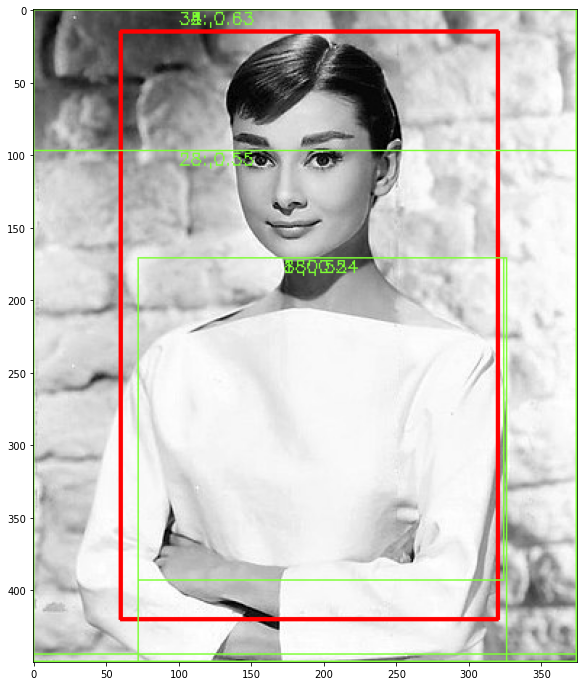

In [ ]:
img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

green_rgb = (125, 255, 51)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 3000]
gt_box = [60, 15, 320, 420]
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

for index,cand_box in enumerate(cand_rects):
  cand_box=list(cand_box)
  cand_box[2]+=cand_box[0]
  cand_box[3]+=cand_box[1]

  iou=compute_ioc(cand_box,gt_box)

  if (iou>0.5):
      print('index:',index,'iou:',iou,'rectangle:',(cand_box[0],cand_box[1],cand_box[2],cand_box[3]))
      cv2.rectangle(img_rgb,(cand_box[0],cand_box[1]),(cand_box[2],cand_box[3]),color=green_rgb,thickness=1)
      text="{}:,{:.2f}".format(index,iou)
      cv2.putText(img_rgb,text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)

plt.figure(figsize=(12,12))
plt.imshow(img_rgb)
plt.show()